# Interactive Machine Learning - Exercise 02

The goal of thi exercise is it to get familiar with convolutional neural networks as well as deep and transfer learning.

The steps you are going to cover in this exercies are as follows:
* Getting hands on with convolution on images
* Train a convolutional neural network to reproduce the output of a specified convolutional kernel

Please read each exercise carefully before you start coding! You will find a number in the comments before each step of coding you will do. Please refer to these numbers if you have any questions.


## 0. Import the libraries
The first step is to define the functions and classes we intend to use in this tutorial.
We will use the NumPy library to load our dataset and we will use two classes from the Keras library to define our model.
Further we use sklearn to accesss code for the Support Vector Machine and a helper file that comes with this notebook.
The helper file contains the functions ```plot_confusion_matrix``` and ```plot_label_distribution```.

The imports required are listed below.
You can run this cell to import all the libraries for later usage.
Keep in mind that you can import additional libraries at any time and that you do not need to use all the imports if you know another solution for a given task.

In [1]:
# hiding all warnings to not clutter the notebook
import warnings
warnings.filterwarnings('ignore')

import glob
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2

import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## 1. Applied convolution
In this exercise we are going to apply a convolution to a given input image.
Specifically we want to build a basic edge detector using the kernel presented in the lecture:

![Kernel](https://hcm-lab.de/cloud/index.php/s/tsk6QkX4WiwSzX7/preview)

To this end you should implement your own convolve function that takes and image and a convolutional kernel as input and returns the convolved image.
To implement the convolutional function you can follow this [tutorial](https://medium.com/analytics-vidhya/image-convolution-from-scratch-d99bf639c32a).
In case you are getting stuck, you can always fall back to use the OpenCV `filter2D()` function instead.
You'll find examples of how to use this function [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html).

To visualize your results you can use the [matplotlib](https://matplotlib.org) library.
Use [`imshow(image)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) to draw an imagefigure and [`plt.show()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) to display this figure.
Keep in mind that if you use OpenCV to load your image, the color channels will be in the order of BGR not RGB, which is expected by matplotlib.
To convert an image from BGR to RGB you can use the `cvtColor()` function from opencv like this:
`cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

### 0. Define kernel for edge detection

In [2]:
kernel = [[-1, -1, -1],
         [-1, 8, -1],
         [-1, -1, -1]]

### 1. Writing convolve function `def convolve(image, kernel)`

In [3]:
def convolve(image, kernel):
    """
    Takes an images in RGB-format with kernel and returns convolved image.
    Applied is cv2.filter2D() function.
    
    Parameters
    ----------
    image: images in the form of array of shape (height, width, channels) with uint8 elements
    kernel: filter in array-like type to be applied to the image
    
    Output
    ------
    out: array of shape (height, width, channels) with uint8 elements  
    """
    
    kernel_2array = np.array(kernel)
    convolved_img = cv2.filter2D(image,-1,kernel_2array)
    return convolved_img
    

### 2. Load image 'imgs/BULBASAUR_0.png'

In [4]:
bulbasaur_bgr = cv2.imread('imgs/BULBASAUR_0.png')
bulbasaur_bgr.shape

(267, 300, 3)

Converting the images into Red, Blue and Green format, that makes sense.

In [5]:
bulbasaur_rgb = cv2.cvtColor(bulbasaur_bgr, cv2.COLOR_BGR2RGB)
bulbasaur_rgb.shape

(267, 300, 3)

### 3. Plot image

Plotting both images, cause I'm curious how they both look

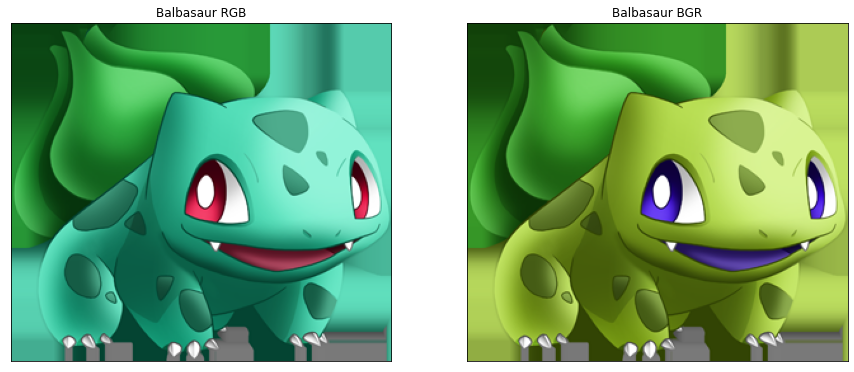

In [6]:
plt.figure(figsize=(15, 10))
plt.axis("off")

plt.subplot(121),plt.imshow(bulbasaur_rgb),plt.title('Balbasaur RGB')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(bulbasaur_bgr),plt.title('Balbasaur BGR')
plt.xticks([]), plt.yticks([])
plt.show()

### 4. Apply convolution

Convolution will only be aaplied to RGB's Balbasaur

In [7]:
convolved_balbasaur = convolve(bulbasaur_rgb, kernel)

### 5. Plot convolved image

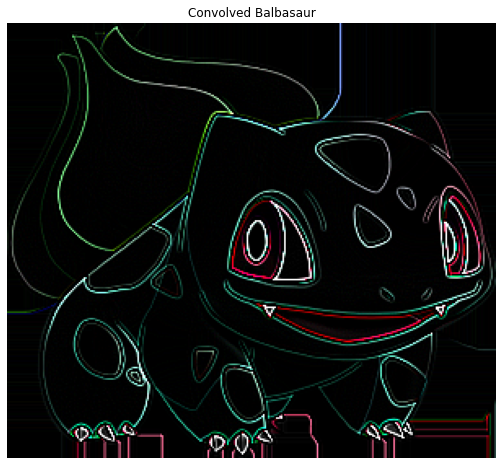

In [8]:
plt.figure(figsize=(12, 8))
plt.axis("off")
plt.imshow(convolved_balbasaur)
plt.title('Convolved Balbasaur')
plt.show()

## 2. Learning a Convolutional Kernel
Now we are going to build a simple convolutional neural network, that should in the end learn to reproduce the same output as our edge detection kernel.
To simplify things a bit, we are using the [keras](https://keras.io/) library.
Since our model is going to do the same like our kernel above, we already know how the model architecture should look like:
At first we need on `Input` layer, that specifies the shape of our input.
After that we are using one `Conv2D` layer with three filters (one for every color channel of our image), having the same shape as our edge detection kernel.

To test our model we are first going to initialize the weights with the same weights we used for our edge detection kernel.
Note that we now have three filters instead of one, but the convolution in the network will consider all color channels for every filter.
We therefore need to initialize each filter with a 3 x 3 x 3 matrix where only one channel is filled with weights, while the others are set to zero:
![Example of Kerneldesign](https://hcm-lab.de/cloud/index.php/s/tFpb8eHgaEadWjb/preview)
To set the weights in the network you can use the [`set_weights()`](https://keras.io/api/layers/base_layer/#set_weights-method) function of the keras base layer class.

Once we are done with setting the weights in our model we are going to use the [`predict()`](https://keras.io/api/models/model_training_apis/#predict-method) function to process the same image, as in part 1 and compare the results (they should look the same).
Be aware that the predict function expects an additional dimension representing the number of input samples.
Since we only process one image we need to manually add another dimension to our image.
You can do this using the numpy function [`expand_dims()`](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html).
The opposite operation is represented by [`squeeze()`](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html).
You can use squeeze to remove the first dimension from the networks output.
Also be aware that the output of the network will be of type float, which means that matplotlib will expect the input to be between 0 and 1.
A convenient way of doing this is to apply data normalization to the input (remember the machine learning basics from last week)... you will need to do this later anyway ;)

### 6. Defining the model - 7. Initializing layers

In [9]:
input_ = Input(shape=(None, None, 3))
conv_layer = Conv2D(filters=3,
                    kernel_size=(3, 3),
                    input_shape=(224, 224, 3),
                    padding="SAME",
                    kernel_initializer=tf.keras.initializers.Ones())(input_)
model = tf.keras.Model(inputs=input_, outputs=conv_layer)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 3)     84        
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

#### Getting shapes of weights from convolutional layer + biases for an illustrative example
##### get_weights() method outputs LIST of neuron weights and biases

### 8. Saving the initial weights of the model and setting new weights. 
#### set_weights expects a list in the form of (kernel_height, kernel_width, input_channels, output_channels) + bias

In [11]:
weights, biases = model.layers[1].get_weights()
weights.shape, biases.shape, biases

((3, 3, 3, 3), (3,), array([0., 0., 0.], dtype=float32))

In [12]:
weights

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

In [13]:
kernel_0 = np.array([[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]])

kernel_1 = np.array([[-1.,-1.,-1.],[-1.,8.,-1.],[-1.,-1.,-1.]])

kernel_r = [kernel_1, kernel_0, kernel_0]
kernel_g = [kernel_0, kernel_1, kernel_0]
kernel_b = [kernel_0, kernel_0, kernel_1]

weights = np.array([kernel_r, kernel_g, kernel_b])

weights_new = np.moveaxis(weights, 0, -1)
weights_new = np.moveaxis(weights, 0, -1)

bias_new = np.array([0.,0.,0.])

#### Setting new weights

In [14]:
weights_ready = [weights_new, bias_new]
model.layers[1].set_weights(weights_ready)

### 9. Predict and visualize results.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:title={'center':'EEVVE Convoluted'}>,
 Text(0.5, 1.0, 'EEVVE Convoluted'))

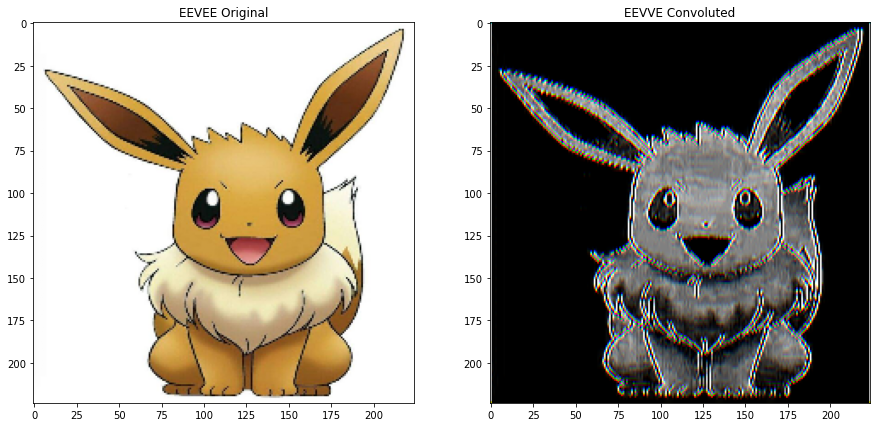

In [15]:
eevee_bgr = cv2.imread('imgs/EEVEE_8.jpg')
eevee_rgb = cv2.cvtColor(eevee_bgr, cv2.COLOR_BGR2RGB)
eevee_resized = cv2.resize(eevee_rgb, (224, 224))

# Scaling to bring input data between 0 and 1
eevee_ready = eevee_resized / 255.0
eevee = np.expand_dims(np.array(eevee_ready),0)
eevee_convolved = np.squeeze(model.predict(eevee), 0)

plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(eevee_ready), plt.title('EEVEE Original')
plt.subplot(122), plt.imshow(eevee_convolved), plt.title('EEVVE Convoluted')

We now know, that our model has the capabilities to perform the simple convolutional operation we have already applied in exercise 1.
In this step we want to see, if we can bring our model to automatically learn the same functionality.
To this end we first need to build a dataset, consisting of training pairs (x,y) where x is the input image and y the convolved output.
Load all input images from the `imgs` folder into an array x.
Make sure that all your images are in the correct channel order and also resize them to have the same dimension.
You can use the OpenCV [`resize()`](https://docs.opencv.org/master/da/d6e/tutorial_py_geometric_transformations.html) function for that.
Then apply the `convolve()` function from exercise 1 to each image in x and store the results in an second array y.
Convert both list to numpy arrays of type float in a value range between 0 and 1 to use them as input for our model.

Then call the keras [`compile()`](https://keras.io/api/models/model_training_apis/#compile-method) method to set the optimizer and loss function.
We suggest that you use the 'adam' optimizer and the 'mse' loss, but feel free to try other options:

* [Optimizer](https://keras.io/api/models/model_training_apis/#compile-method)
* [Losses](https://keras.io/api/losses/)

Once the model has been compiled you can now start fitting it to your data using the keras [`fit()`](https://keras.io/api/models/model_training_apis/#fit-method) function.
Use the keras [checkpoint callback]( https://keras.io/api/models/model_training_apis/#fit-method
) to save your model every few epochs.

### 10. Loading data into x

#### Loading all input images from the imgs folder into an array x.

In [16]:
x_bgr = [cv2.imread(file) for file in glob.glob("imgs/*")]
len(x_bgr)

347

#### Making sure that all images are in the correct channel orde

In [17]:
x_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in x_bgr]
len(x_rgb)

347

#### Resizing images to have the same dimension.

In [18]:
x = [cv2.resize(x_image, (224, 224)) for x_image in x_rgb]
len(x)

347

### 11. Apply filter to x and story results in y 
Applying the convolve() function from exercise 1 to each image in x and storing the results in an second array y.

In [19]:
y = [convolve(x_image, kernel) for x_image in x]

In [20]:
len(y)

347

### 12. Convert to numpy array
Converting both lists to numpy arrays of type float in a value range between 0 and 1 to use them as input for our model.

In [21]:
x_ready = np.asarray(x, dtype=float)/255
y_ready = np.asarray(y, dtype=float)/255

x_ready.shape, y_ready.shape # (batch_size, height, width, channels)

((347, 224, 224, 3), (347, 224, 224, 3))

### 13. Reset and compile network 

In [22]:
model.compile(optimizer='adam', loss='mse')

### 14. Train model and save results

In [23]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("conv_model_ex3.h5") 

history = model.fit(x_ready, y_ready, epochs=70, callbacks=[checkpoint_cb])

Epoch 1/70
11/11 [==============================] - 1s 97ms/step - loss: 0.8781
Epoch 2/70
11/11 [==============================] - 1s 100ms/step - loss: 0.8337
Epoch 3/70
11/11 [==============================] - 1s 99ms/step - loss: 0.8188
Epoch 4/70
11/11 [==============================] - 1s 102ms/step - loss: 0.8037
Epoch 5/70
11/11 [==============================] - 1s 99ms/step - loss: 0.7888
Epoch 6/70
11/11 [==============================] - 1s 100ms/step - loss: 0.7724
Epoch 7/70
11/11 [==============================] - 1s 100ms/step - loss: 0.7568
Epoch 8/70
11/11 [==============================] - 1s 101ms/step - loss: 0.7411
Epoch 9/70
11/11 [==============================] - 1s 98ms/step - loss: 0.7251
Epoch 10/70
11/11 [==============================] - 1s 101ms/step - loss: 0.7095
Epoch 11/70
11/11 [==============================] - 1s 101ms/step - loss: 0.6937
Epoch 12/70
11/11 [==============================] - 1s 99ms/step - loss: 0.6788
Epoch 13/70
11/11 [===========

We now want to have look at the results of our model.
Load all the checkpoints you saved using the keras [load_weights() or load_model()](https://keras.io/api/models/model_saving_apis/) function and predict the same image as in the previous exercises.
What do you notice?

### 15. Predict and visualize results. 

In [24]:
model_best = keras.models.load_model("conv_model_ex3.h5")

In [25]:
y_pred = np.squeeze(model_best.predict(eevee), 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:title={'center':'EEVVE Convoluted'}>,
 Text(0.5, 1.0, 'EEVVE Convoluted'))

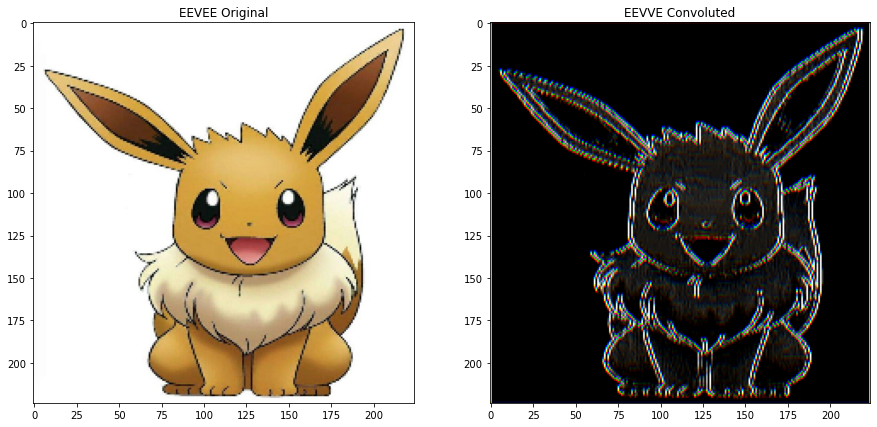

In [26]:
plt.figure(figsize=(15, 10))

plt.subplot(121), plt.imshow(eevee_ready), plt.title('EEVEE Original')
plt.subplot(122), plt.imshow(y_pred), plt.title('EEVVE Convoluted')

## 3. A 'real' problem

In this exercise we are going to tackle a more complex real world problem: Building our own classifier from scratch.
To this end we rely on a CNN architecture that has proven to work really well on the [ImageNet challenge](http://www.image-net.org/challenges/LSVRC/).
The network architecture has been named [VGG16](https://arxiv.org/abs/1409.1556) and consists out of
following layers.

* Input shape 224 x 224 x 3
* Convolutional layer with 64 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* Convolutional layer with 64 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* MaxPooling layer with a pool size of 2 x 2 and stride size of 2 x 2
* Convolutional layer with 128 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* Convolutional layer with 128 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* MaxPooling layer with a pool size of 2 x 2 and stride size of 2 x 2
* Convolutional layer with 256 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* Convolutional layer with 256 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* Convolutional layer with 256 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* MaxPooling layer with a pool size of 2 x 2 and stride size of 2 x 2
* Convolutional layer with 512 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* Convolutional layer with 512 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* Convolutional layer with 512 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* MaxPooling layer with a pool size of 2 x 2 and stride size of 2 x 2
* Convolutional layer with 512 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* Convolutional layer with 512 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* Convolutional layer with 512 filters, filter matrix with the shape 3 x 3 and relu as an activation function
* MaxPooling layer with a pool size of 2 x 2 and stride size of 2 x 2
* Flatten layer
* Dense layer with 4096 fully connected nodes and relu as an activation function
* Dense layer with 4096 fully connected nodes and relu as an activation function
* Dense layer with number of nodes corresponding to the number of classes and softmax as an activation function

When compiling your model use the 'adam' optimizer and the 'categorical_crossentropy' loss function.
This is in general a good combination for most multi-class classification problems.

### 16. Define your model

In [27]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_vgg = keras.models.Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(64, 3, activation="relu", padding="SAME"),
    Conv2D(64, 3, activation="relu", padding="SAME"),
    MaxPooling2D(2),
    Conv2D(128, 3, activation="relu", padding="SAME"),
    Conv2D(128, 3, activation="relu", padding="SAME"),
    MaxPooling2D(2),
    Conv2D(256, 3, activation="relu", padding="SAME"),
    Conv2D(256, 3, activation="relu", padding="SAME"),
    Conv2D(256, 3, activation="relu", padding="SAME"),
    MaxPooling2D(2),
    Conv2D(512, 3, activation="relu", padding="SAME"),
    Conv2D(512, 3, activation="relu", padding="SAME"),
    Conv2D(512, 3, activation="relu", padding="SAME"),
    MaxPooling2D(2),
    Conv2D(512, 3, activation="relu", padding="SAME"),
    Conv2D(512, 3, activation="relu", padding="SAME"),
    Conv2D(512, 3, activation="relu", padding="SAME"),
    MaxPooling2D(2),
    Flatten(),
    Dense(units=4096, activation='relu'),
    Dense(units=4096, activation='relu'),
    Dense(units=8, activation='softmax')
])
model_vgg._name = 'VGG_Model'
model_vgg.summary()

Model: "VGG_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       29

In [28]:
adam=keras.optimizers.Adam(lr=0.0001)

model_vgg.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'] )

After we built the network we are now going to train it on our Pokemon dataset.
To this end we first need to load the data and split it into training and validation set (remember the slides).
Also we are going to build a new, one-hot-encoded label array.
For this step you need to map every Pokemon to consecutive numbers.
Then each label will be a vector of the length 8 (8 is the number of different pokemon we want to recognize), where each entry is zero but the index of the number that belongs to the respective pokemon is 1.

### 17. Loading data again 

In [29]:
x_vgg_rgb = [cv2.imread(file) for file in glob.glob("imgs/*")]
x_vgg_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in x_vgg_rgb]
x_vgg_resized = [cv2.resize(x_image, (224, 224)) for x_image in x_vgg_rgb]

x_vgg_ready = np.asarray(x_vgg_resized, dtype=float)/255.

In [30]:
x_vgg_ready.shape

(347, 224, 224, 3)

### 18. Building label array

In [31]:
pokemons = ['bulbasaur', 'charmander', 'eevee', 'flareon', 'jolteon', 'pikachu', 'squirtle', 'vaporeon']

y = [pokemons.index(x.split('/')[1].split('_')[0].lower()) for x in glob.glob("imgs/*")]
y_vgg_ready = tf.keras.utils.to_categorical(y, 8)

In [32]:
y_vgg_ready

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_vgg_ready, y_vgg_ready, train_size=0.8, random_state=42)

### 19. Instantiating our tensorboard callback 

To track the training progression tensorflow provides the visualisation tool tensorboard.
To use tensorboard we need to add a callback to our `fit()` function: [Tensorboard Callback](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/callbacks/TensorBoard)
You can find and example of how to use such callbacks [here](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/callbacks/TensorBoard).
The tensorboard can be started with following command: `tensorboard --logdir=/full_path_to_your_logs`
Train your model for 5 epochs and look at the results in the tensorboard.
What do you notice?

In [34]:
# defining the root log directory for TensorBoard logs 
root_logdir = os.path.join(os.curdir, "my_logs")


def get_run_logdir(): 
    """
    Function generates a subdirectory path based on the current date and time.
    """
    
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

### 20. Fitting the model to the data

Using EarlyStopping callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model. 

In [36]:
type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [35]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model_vgg_epochs_5.h5")

# early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


history = model_vgg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=4,
             callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/5
 1/70 [..............................] - ETA: 0s - loss: 2.0809 - accuracy: 0.0000e+00WARNING:tensorflow:From /Users/paulmospan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
70/70 [==============================] - 123s 2s/step - loss: 2.0803 - accuracy: 0.1408 - val_loss: 2.0795 - val_accuracy: 0.1571
Epoch 2/5
70/70 [==============================] - 122s 2s/step - loss: 2.0620 - accuracy: 0.1661 - val_loss: 2.0824 - val_accuracy: 0.1143
Epoch 3/5
70/70 [==============================] - 122s 2s/step - loss: 2.0761 - accuracy: 0.1552 - val_loss: 2.0817 - val_accuracy: 0.1143
Epoch 4/5
70/70 [==============================] - 127s 2s/step - loss: 2.0653 - accuracy: 0.1552 - val_loss: 2.0929 - val_accuracy: 0.1571
Epoch 5/5
70/70 [==============================] - 124s

#### TensorBoard directly within Jupyter 

In [36]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 74038), started 0:15:47 ago. (Use '!kill 74038' to kill it.)

### Answer to the question "look at the results in the tensorboard. What do you notice?"

Regarding <b>epoch loss</b> I see that <i>training loss</i> is decreasing a little bit, whilst  <i>validation</i> one increases.

What goes to <b>epoch's accuracy</b> is that it is awfully bad. <i>Training accuracy</i> increased for a little bit in these 5 epochs, while <i>validation accuracy</i> decreased for 2 epochs but then went back.

Overall, I can summarize, that we need to train the model for more than 15-20 epochs and then we will see great results. I've actually did that for 15 epochs. Unfortenately I deleted log files, sowwy

## 4. Transfer Learning
To improve upon your results we are going to apply a transfer learning approach.
To make things easier we can import an already pretrained version of the vgg16 model using Keras applications:
`keras.applications.VGG16(weights="imagenet", include_top = False, input_shape=(224, 224, 3))`
Note that the model was trained on images of the size 224x224.
It's best to resize your input to the same size and apply the same preprocessing methods.
[Here](https://keras.io/api/applications/) you can find some examples on how to further use the pre existing models.

Now finetune the vgg16 model for 5 epochs and look at the results in tensorboard.
Compare them to the results from the exercise before.
What do you notice?

### 21. Instantiate pretrained vgg16 model

In [37]:
from tensorflow.keras.applications.vgg16 import VGG16

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model_vgg16_keras = tf.keras.applications.VGG16(weights="imagenet", include_top = False, 
                                                input_shape=(224, 224, 3))

model_vgg16_keras.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### 22. Adapt last layers of the models according to our problem

In [38]:
model_vgg16_keras_MINE = tf.keras.models.Sequential()

model_vgg16_keras_MINE.add(model_vgg16_keras)
model_vgg16_keras_MINE.add(Flatten())
model_vgg16_keras_MINE.add(Dense(1024, activation='relu'))
model_vgg16_keras_MINE.add(Dense(512, activation='relu'))
model_vgg16_keras_MINE.add(Dense(8, activation='softmax'))
model_vgg16_keras_MINE._name = 'VGG_Model_from_Keras'
model_vgg16_keras_MINE.summary()

Model: "VGG_Model_from_Keras"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 4104      
Total params: 40,934,728
Trainable params: 40,934,728
Non-trainable params: 0
_________________________________________________________________


Freezing the reused layers during the first few epochs, giving the new layer some time to learn reasonable weights.

In [39]:
for layer in model_vgg16_keras.layers:    
    layer.trainable = False

### 23. Train the model

In [40]:
# defining the new log directory for TensorBoard logs 
root_logdir = os.path.join(os.curdir, "my_logs/keras_vgg")

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [41]:
# adam optimizer is from previous model and has learning rate 0.0001
model_vgg16_keras_MINE.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

#checkpoint_cb = keras.callbacks.ModelCheckpoint("model_vgg_from_keras.h5")
                                                        
model_vgg16_keras_MINE.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=5, batch_size=8, 
                           callbacks=[tensorboard_cb])

Epoch 1/5
35/35 [==============================] - 25s 703ms/step - loss: 1.6733 - accuracy: 0.5199 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
35/35 [==============================] - 25s 709ms/step - loss: 0.1206 - accuracy: 0.9639 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
35/35 [==============================] - 27s 758ms/step - loss: 0.0318 - accuracy: 0.9928 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
35/35 [==============================] - 27s 767ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
35/35 [==============================] - 25s 710ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


### Tensorboard for reused model

In [42]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs/keras_vgg --port=6012

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Answer to the question " look at the results in tensorboard. Compare them to the results from the exercise before. What do you notice?"



I noticed that, with pretrained network accuracy is much better, because our training images look somewhat like the images from imagenet challenge and vgg16 model was pretrained on these images - goal of transfer learning. Although, I cannot explain how come validation's accuracy and loss are zeros throught whole training